In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset from local path
data=pd.read_csv(r'C:\Users\getsd\Desktop\DA- Portfolios/202307-divvy-tripdata.csv')
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [3]:
#checking the rows and columns of the dataset
data.shape

(767650, 13)

In [4]:
#check for the column names in the dataset
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [5]:
#checking for basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  644707 non-null  object 
 5   start_station_id    644707 non-null  object 
 6   end_station_name    637346 non-null  object 
 7   end_station_id      637346 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             766396 non-null  float64
 11  end_lng             766396 non-null  float64
 12  member_casual       767650 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.1+ MB


In [6]:
#chexking for missing values
data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122943
start_station_id      122943
end_station_name      130304
end_station_id        130304
start_lat                  0
start_lng                  0
end_lat                 1254
end_lng                 1254
member_casual              0
dtype: int64

Text(0.5, 1.0, 'Missing Values of the dataset')

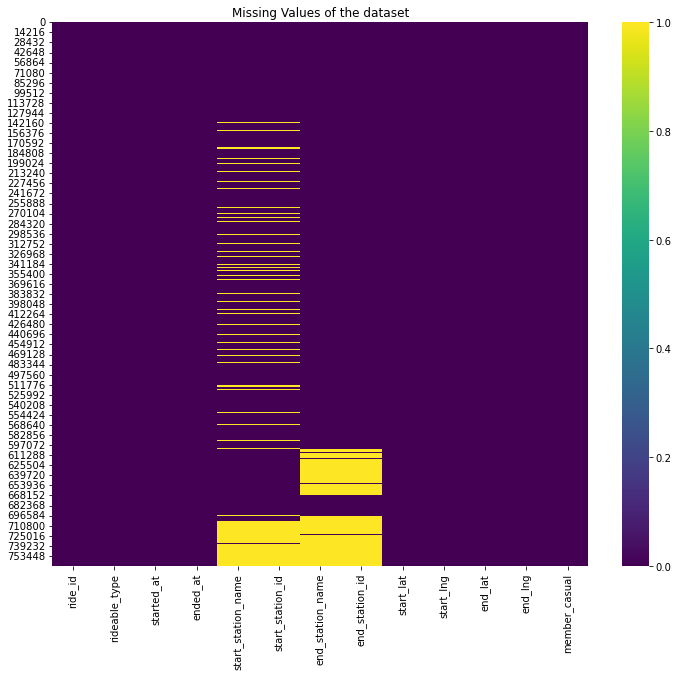

In [7]:
#heatmap representation
plt.figure(figsize=(12,10))
sns.heatmap(data.isna(),cmap='viridis')
plt.title('Missing Values of the dataset')

In [8]:
backup_data=data.copy()

In [9]:
#Percentage wise representation of missing data
100*data.isna().sum()/data.shape[0]

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    16.015502
start_station_id      16.015502
end_station_name      16.974402
end_station_id        16.974402
start_lat              0.000000
start_lng              0.000000
end_lat                0.163356
end_lng                0.163356
member_casual          0.000000
dtype: float64

In [10]:
#Dropping rows with missing values
data.dropna(axis=0,inplace=True)
data.shape

(573958, 13)

In [11]:
data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [12]:
#from the first 10 rows of the dataset, we can see that ride_id column is a unique identifier and hence is not important for our analysis. Hence dropping the column
data.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member
5,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.884069,-87.656853,41.885779,-87.651025,member
6,E366E997FDA1582B,classic_bike,2023-07-25 14:30:44,2023-07-25 14:37:45,Clark St & Leland Ave,TA1309000014,Sheridan Rd & Montrose Ave,TA1307000107,41.967088,-87.667291,41.961670,-87.654640,member
7,1BB3E73851E6C2C1,classic_bike,2023-07-07 10:11:53,2023-07-07 10:17:55,Clark St & Leland Ave,TA1309000014,Ravenswood Ave & Berteau Ave,TA1309000018,41.967088,-87.667291,41.957921,-87.673567,member
8,DA1E1D0866E6566E,electric_bike,2023-07-04 21:57:27,2023-07-04 22:08:27,Clark St & Leland Ave,TA1309000014,Sheffield Ave & Wellington Ave,TA1307000052,41.967091,-87.667486,41.936253,-87.652662,member
9,39BF4A73A704CA85,classic_bike,2023-07-29 10:51:17,2023-07-29 11:03:13,Warren Park East,RP-002,Sheridan Rd & Loyola Ave,RP-009,42.004550,-87.680666,42.001044,-87.661198,member


In [13]:
data.drop('ride_id',axis=1,inplace=True)
data.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual'],
      dtype='object')

In [14]:
#checking for data types of the columns
data.dtypes

rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [15]:
#we can see from the first rows and the column name that started_at and ended_at should be of the data type datetime and not object. Hence Transforming the columns
data['started_at']=pd.to_datetime(data['started_at'])
data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [16]:
#checking if the transformation was successful
data.dtypes

rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [17]:
#converting the ended_at column of the dataset
data['ended_at']=pd.to_datetime(data['ended_at'])
data.dtypes

rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [18]:
#creating a column to caluclate the duration of time for which the bikes were rented
data['duration']=data['ended_at']-data['started_at']
data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30
1,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30
2,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36
3,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56
4,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26


In [19]:
#extracting number of days from our calculated column
data['duration_days']=data['duration'].dt.days
data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_days
0,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30,0
1,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30,0
2,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36,0
3,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56,0
4,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26,0


In [32]:
#extracting number of hours from our calculated column
import datetime as dt
#def extract_hour(x):
#    return x.dt.components['hours']

data['duration_hour']=data['duration'].dt.components['hours']
data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_days,duration_hour
0,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30,0,0
1,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30,0,0
2,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36,0,0
3,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56,0,0
4,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26,0,0


In [33]:
data['duration_minutes']=data['duration'].dt.components['minutes']
data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_days,duration_hour,duration_minutes
0,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0 days 00:16:30,0,0,16
1,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0 days 00:13:30,0,0,13
2,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0 days 00:09:36,0,0,9
3,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0 days 00:04:56,0,0,4
4,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0 days 00:11:26,0,0,11


In [34]:
data.dtypes

rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
duration              timedelta64[ns]
duration_days                   int64
duration_hour                   int64
duration_minutes                int64
dtype: object

In [35]:
data.sample(10)

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_days,duration_hour,duration_minutes
102967,classic_bike,2023-07-04 11:39:35,2023-07-04 11:43:37,Desplaines St & Randolph St,15535,Kingsbury St & Kinzie St,KA1503000043,41.884616,-87.644571,41.889177,-87.638506,member,0 days 00:04:02,0,0,4
556296,classic_bike,2023-07-10 17:24:34,2023-07-10 17:36:49,Clinton St & Washington Blvd,WL-012,LaSalle St & Illinois St,13430,41.883380,-87.641170,41.890762,-87.631697,casual,0 days 00:12:15,0,0,12
408180,electric_bike,2023-07-18 17:22:40,2023-07-18 17:35:46,Carpenter St & Huron St,13196,McClurg Ct & Ohio St,TA1306000029,41.894532,-87.653507,41.892592,-87.617289,member,0 days 00:13:06,0,0,13
337151,docked_bike,2023-07-04 17:10:03,2023-07-04 17:56:43,McClurg Ct & Ohio St,TA1306000029,Lakefront Trail & Wilson Ave,639,41.892592,-87.617289,41.965845,-87.645361,casual,0 days 00:46:40,0,0,46
251054,classic_bike,2023-07-06 16:02:22,2023-07-06 16:17:23,MLK Jr Dr & 63rd St,KA1503000053,MLK Jr Dr & 63rd St,KA1503000053,41.780081,-87.615943,41.780081,-87.615943,casual,0 days 00:15:01,0,0,15
62491,classic_bike,2023-07-17 16:53:28,2023-07-17 18:06:45,Rush St & Cedar St,KA1504000133,Michigan Ave & Oak St,13042,41.902309,-87.627691,41.900960,-87.623777,casual,0 days 01:13:17,0,1,13
525292,electric_bike,2023-07-05 09:45:38,2023-07-05 09:58:52,Indiana Ave & Roosevelt Rd,SL-005,Cityfront Plaza Dr & Pioneer Ct,13427,41.867980,-87.623066,41.890573,-87.622072,casual,0 days 00:13:14,0,0,13
373132,electric_bike,2023-07-07 18:00:21,2023-07-07 18:08:29,Sheridan Rd & Buena Ave,TA1309000027,Broadway & Waveland Ave,13325,41.958493,-87.654975,41.949074,-87.648636,casual,0 days 00:08:08,0,0,8
169673,docked_bike,2023-07-10 17:18:17,2023-07-10 17:40:53,Streeter Dr & Grand Ave,13022,Cannon Dr & Fullerton Ave,13124,41.892278,-87.612043,41.926756,-87.634429,casual,0 days 00:22:36,0,0,22
84713,classic_bike,2023-07-19 21:12:34,2023-07-19 21:40:39,Streeter Dr & Grand Ave,13022,Clark St & Wrightwood Ave,TA1305000014,41.892278,-87.612043,41.929546,-87.643118,member,0 days 00:28:05,0,0,28


In [37]:
#checking for different values of the days extracted from duration calculated column
data['duration_days'].unique()

array([ 0,  1, -1], dtype=int64)

In [40]:
#checking for the days which were returned as -1
data[data['duration_days']<0]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_days,duration_hour,duration_minutes
251240,electric_bike,2023-07-30 01:21:48,2023-07-30 01:21:44,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943326,-87.670737,41.943324,-87.670748,casual,-1 days +23:59:56,-1,23,59
354273,electric_bike,2023-07-20 12:54:28,2023-07-20 12:54:27,California Ave & Marquette Rd,390,California Ave & Marquette Rd,390,41.771597,-87.693339,41.771579,-87.693357,casual,-1 days +23:59:59,-1,23,59
724028,electric_bike,2023-07-20 11:04:45,2023-07-20 11:04:44,Public Rack - Milwaukee Ave & Higgins Ave,1121.0,Public Rack - Milwaukee Ave & Higgins Ave,1121.0,41.968576,-87.761332,41.968596,-87.761209,member,-1 days +23:59:59,-1,23,59


In [41]:
#these 3 columns are not correctly formatted as evident from the started at and ended at columns
data.drop(index=[251240,354273,724028],inplace=True)
#checking again to see if the values were dropped
data[data['duration_days']<0]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_days,duration_hour,duration_minutes


In [42]:
data['duration_days'].unique()

array([0, 1], dtype=int64)

In [38]:
data['duration_hour'].unique()

array([ 0,  1,  2, 12,  3,  6,  5, 17, 22, 16, 15, 11,  4, 10,  7, 19,  9,
       13,  8, 14, 20, 21, 23, 18], dtype=int64)

In [36]:
#Now the datatypes of the columns are properly reflected
#Checking for the different values of the rideable_type column
data['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [46]:
data.groupby('rideable_type')['duration_days','duration_hour','duration_minutes'].mean()

C:\Users\getsd\AppData\Local\Temp\ipykernel_19036\3480426796.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('rideable_type')['duration_days','duration_hour','duration_minutes'].mean()


,duration_days,duration_hour,duration_minutes
rideable_type,,,
classic_bike,0.000033,0.065951,14.617965
docked_bike,0.000337,0.501795,24.614077
electric_bike,0.000000,0.020471,12.005533


In [44]:
#checking for different/unique values of ther member_casual column
data['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [47]:
#checking for mean values for hour and minutes based on the member_casual colmn
data.groupby('member_casual')['duration_days','duration_hour','duration_minutes'].mean()

C:\Users\getsd\AppData\Local\Temp\ipykernel_19036\1264337930.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('member_casual')['duration_days','duration_hour','duration_minutes'].mean()


,duration_days,duration_hour,duration_minutes
member_casual,,,
casual,0.000065,0.129291,16.874280
member,0.000006,0.015387,11.928997


In [48]:
#checking for count of values for hour and minutes based on the member_casual column
data.groupby('member_casual')['duration_days','duration_hour','duration_minutes'].count()

C:\Users\getsd\AppData\Local\Temp\ipykernel_19036\1294625526.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('member_casual')['duration_days','duration_hour','duration_minutes'].count()


,duration_days,duration_hour,duration_minutes
member_casual,,,
casual,245292,245292,245292
member,328663,328663,328663


Text(0.5, 1.0, 'Visual representation of the distribution of the starting locations for bike rides')

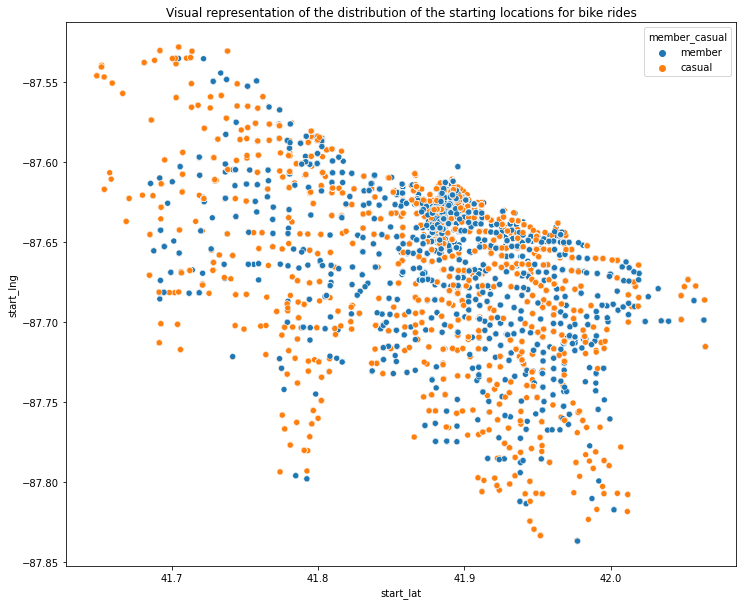

In [50]:
#creating a visual representation of the starting location for the bike rides
plt.figure(figsize=(12,10))
sns.scatterplot(x='start_lat',y='start_lng',data=data,hue='member_casual')
plt.title('Visual representation of the distribution of the starting locations for bike rides')

Text(0.5, 1.0, 'Visual representation of the distribution of the starting locations for bike rides as per bike types')

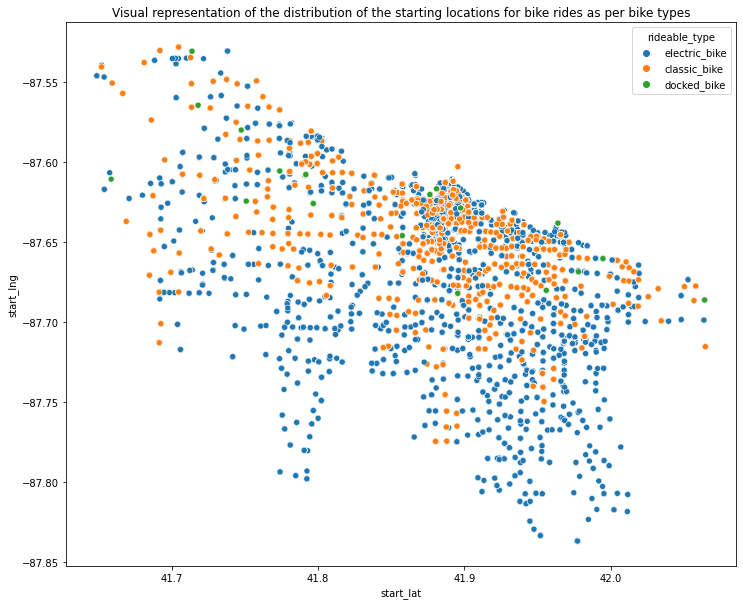

In [51]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='start_lat',y='start_lng',data=data,hue='rideable_type')
plt.title('Visual representation of the distribution of the starting locations for bike rides as per bike types')

Text(0.5, 1.0, 'Visual representation of the distribution of the ending locations for bike rides')

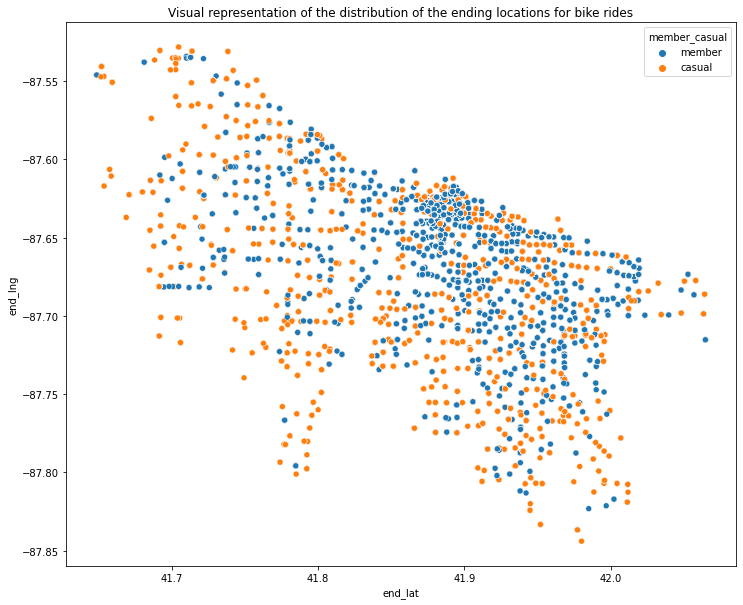

In [53]:
#creating a visual representation of the ending location for the bike rides
plt.figure(figsize=(12,10))
sns.scatterplot(x='end_lat',y='end_lng',data=data,hue='member_casual')
plt.title('Visual representation of the distribution of the ending locations for bike rides')

In [54]:
data.groupby(['rideable_type','member_casual'])['duration_days','duration_hour','duration_minutes'].mean()

C:\Users\getsd\AppData\Local\Temp\ipykernel_19036\2141491138.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['rideable_type','member_casual'])['duration_days','duration_hour','duration_minutes'].mean()


duration_days  duration_hour  duration_minutes
rideable_type member_casual                                                
classic_bike  casual              0.000070       0.138983         17.741169
              member              0.000009       0.018498         12.588633
docked_bike   casual              0.000337       0.501795         24.614077
electric_bike casual              0.000000       0.035030         13.802407
              member              0.000000       0.009164         10.609865

Text(0.5, 1.0, 'Visual representation of the distribution of the ending locations for bike rides')

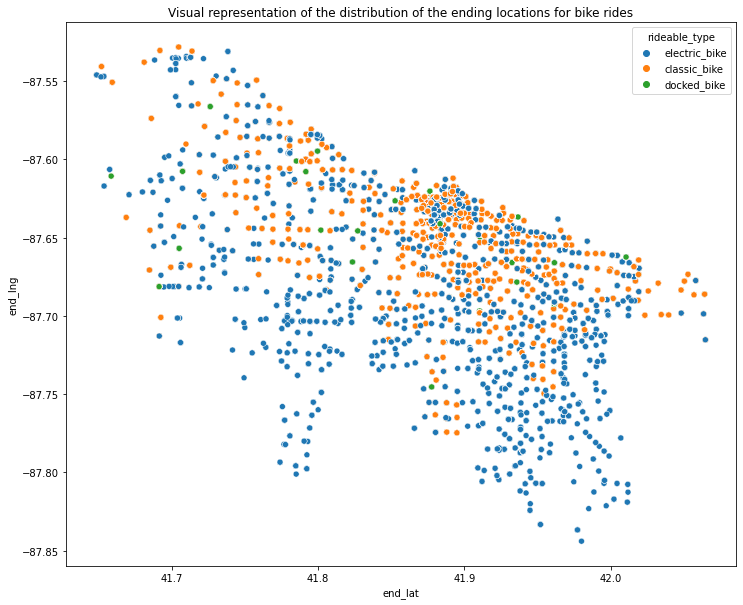

In [55]:
#creating a visual representation of the ending location for the bike rides
plt.figure(figsize=(12,10))
sns.scatterplot(x='end_lat',y='end_lng',data=data,hue='rideable_type')
plt.title('Visual representation of the distribution of the ending locations for bike rides')

In [56]:
data.sample(10)

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_days,duration_hour,duration_minutes
687222,electric_bike,2023-07-11 07:36:23,2023-07-11 07:49:24,Streeter Dr & Grand Ave,13022,Clinton St & Washington Blvd,WL-012,41.892322,-87.612174,41.883380,-87.641170,member,0 days 00:13:01,0,0,13
257885,classic_bike,2023-07-01 17:46:23,2023-07-01 17:46:51,Fort Dearborn Dr & 31st St*,chargingstx06,Fort Dearborn Dr & 31st St*,chargingstx06,41.838676,-87.608832,41.838676,-87.608832,casual,0 days 00:00:28,0,0,0
93670,classic_bike,2023-07-06 15:04:03,2023-07-06 15:25:28,Paulina St & Howard St,515,Chicago Ave & Sheridan Rd,E008,42.019159,-87.673573,42.050491,-87.677821,member,0 days 00:21:25,0,0,21
559772,docked_bike,2023-07-25 08:21:25,2023-07-25 08:22:19,Sheffield Ave & Fullerton Ave,TA1306000016,Sheffield Ave & Fullerton Ave,TA1306000016,41.925602,-87.653708,41.925602,-87.653708,casual,0 days 00:00:54,0,0,0
298517,classic_bike,2023-07-09 16:59:52,2023-07-09 17:16:22,Franklin St & Lake St,TA1307000111,Bissell St & Armitage Ave*,chargingstx1,41.885837,-87.635500,41.918296,-87.652183,member,0 days 00:16:30,0,0,16
520097,docked_bike,2023-07-01 16:43:14,2023-07-01 17:09:53,Millennium Park,13008,Cityfront Plaza Dr & Pioneer Ct,13427,41.881032,-87.624084,41.890573,-87.622072,casual,0 days 00:26:39,0,0,26
54522,classic_bike,2023-07-30 20:57:20,2023-07-30 21:37:12,Clark St & Lake St,KA1503000012,Wood St & Milwaukee Ave,13221,41.886021,-87.630876,41.907655,-87.672552,member,0 days 00:39:52,0,0,39
355165,electric_bike,2023-07-07 15:25:16,2023-07-07 15:32:55,Michigan Ave & Oak St,13042,Sedgwick St & North Ave,TA1307000038,41.900979,-87.623829,41.911386,-87.638677,member,0 days 00:07:39,0,0,7
193472,docked_bike,2023-07-22 14:04:48,2023-07-22 14:41:53,Franklin St & Illinois St,RN-,Columbus Dr & Randolph St,13263,41.891023,-87.635480,41.884728,-87.619521,casual,0 days 00:37:05,0,0,37
151695,electric_bike,2023-07-21 17:16:25,2023-07-21 17:32:19,Ritchie Ct & Banks St,KA1504000134,Sangamon St & Washington Blvd,13409,41.906571,-87.626108,41.883165,-87.651100,casual,0 days 00:15:54,0,0,15
